In [1]:
import torch
from torch.utils.data import Dataset, SubsetRandomSampler, DataLoader
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import Dataset
import pandas as pd
from stratified_sampling import split_indices
from embryo_dataset import EmbryoDataset

In [2]:
def split_indices(n, train_pct, val_pct, seed=None, stratify=None):
    """ Return indices for train, validation, and test subsets, ensuring
        that class distribution remains the same across different datasets.
    """
    np.random.seed(seed)
    indices = np.random.permutation(n)

    if stratify is not None:
        stratify = np.array(stratify)
        sorted_idx = np.argsort(stratify)
        indices = indices[sorted_idx]

    train_end = int(train_pct * n)
    val_end = int(val_pct * n) + train_end

    train_indices = indices[:train_end]
    val_indices = indices[train_end:val_end]
    test_indices = indices[val_end:]

    return train_indices, val_indices, test_indices


In [6]:
class EmbryoDataset(Dataset):
    def __init__ (self, txt_path, transform=None):
        with open(txt_path, 'r') as f:
            lines = f.readlines()
        self.img_list = [line.split()[0] for line in lines]
        self.label_list = [line.split()[1] for line in lines]
        self.transform = transform

    def __len__(self):
        return len(self.img_list)
    
    def __getitem__ (self, index):
        img_path = self.img_list[index]
        image = Image.open(img_path).convert('RGB')
        print("IMAGE SIZE !!!!! : ", image.size)
        label = int(self.label_list[index])
        if self.transform:
            image = self.transform(image)
        
        return image, label
    

In [7]:
# Define your train transforms which include the augmentations
train_transforms = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(200, padding=10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.Resize((210, 210))
])

# Initialize the dataset with the transformations
dataset_with_augmentation = EmbryoDataset(txt_path="ed4_as_target.txt", transform=train_transforms)

def show_image(img):
    """Utility function to display an image."""
    plt.imshow(img)
    plt.axis('off')



IMAGE SIZE !!!!! :  (210, 210)
IMAGE SIZE !!!!! :  (210, 210)


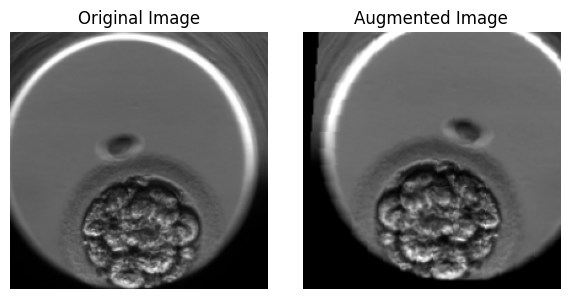

IMAGE SIZE !!!!! :  (210, 210)
IMAGE SIZE !!!!! :  (210, 210)


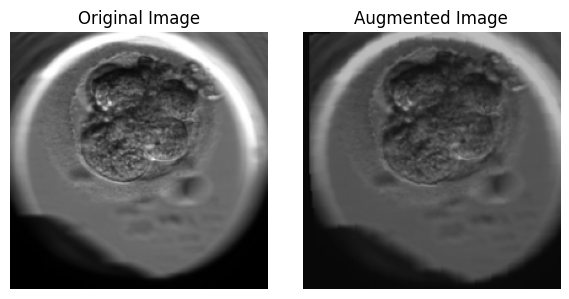

IMAGE SIZE !!!!! :  (210, 210)
IMAGE SIZE !!!!! :  (210, 210)


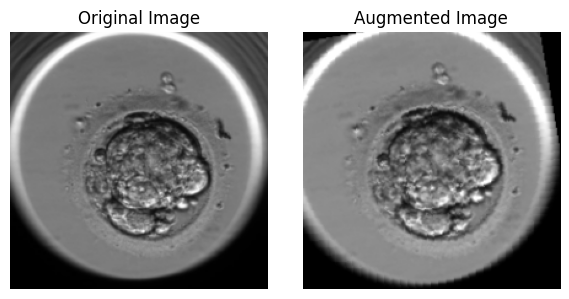

IMAGE SIZE !!!!! :  (210, 210)
IMAGE SIZE !!!!! :  (210, 210)


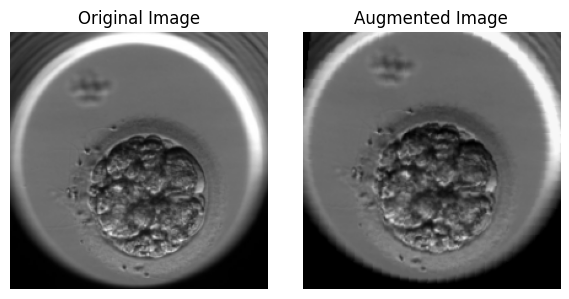

IMAGE SIZE !!!!! :  (210, 210)
IMAGE SIZE !!!!! :  (210, 210)


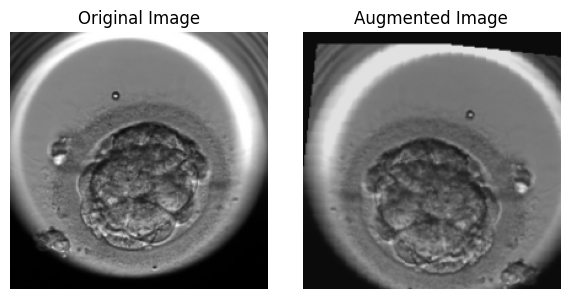

In [8]:
# Number of images you want to visualize
num_images = 5

# Display the original and augmented images side by side
for i in range(num_images):
    # Get the original image without any augmentation
    original_img, _ = EmbryoDataset(txt_path="ed4_as_target.txt")[i]
    
    # Get the augmented image
    augmented_img, _ = dataset_with_augmentation[i]

    plt.figure(figsize=(6, 3))

    # Show original image
    plt.subplot(1, 2, 1)
    show_image(original_img)
    plt.title("Original Image")

    # Show augmented image
    plt.subplot(1, 2, 2)
    show_image(augmented_img)
    plt.title("Augmented Image")

    plt.tight_layout()
    plt.show()